In [1]:
import darts_advisor
import matplotlib.pyplot as plt

In [2]:
# 'discount' by 'd' for every 3 darts thrown in order to evalaute relative speen of paths
d = 0.95

# how accurate is our player?
a = {
'pdd': 0.45,
'pds' : 0.325,
'ptt' : 0.4,
'pbb' : 0.40,
'pbob' : 0.4
}

In [3]:
p = darts_advisor.Player(d, a)

/Users/oli/Desktop/coding_projects/darts/darts_advisor.py:16: RuntimeWarning: divide by zero encountered in log10
  self.strategy_values)/np.log10(self.discount_rate)


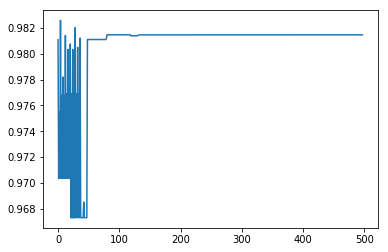

In [5]:
plt.plot(p.strategy_values[0,4:])

In [8]:
p.strategies

,first,second,third
0,finished,finished,finished
1,bust,bust,bust
2,double 1,double 1,double 1
3,single 1,single 1,single 1
4,double 2,double 2,double 2
5,single 1,single 3,single 1
6,double 3,double 3,double 3
7,single 3,single 5,single 3
8,double 4,double 4,double 4
9,single 5,single 7,single 1


In [ ]:
p.find_average()